1. chạy block "2clone data" 
2. chạy block "1lib"
3. chạy block "4prepare- data"
4. chạy block "5creat data-gen"  *mask =True
5. chạy block "6Model Unet"


In [ ]:
!nvidia-smi

Sun Jul 25 06:41:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 1Lib

In [ ]:
import matplotlib.pyplot as plt
from imutils import paths

from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array, array_to_img, load_img

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from keras.layers.merge import add
import numpy as np
import random
import os
import json
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import torch

import tensorflow as tf
import albumentations as A
from keras.utils.vis_utils import plot_model


In [ ]:
from tensorflow.keras.layers import  Reshape,Concatenate,Input,Dropout,Conv2D , Flatten , Dense , MaxPool2D , BatchNormalization , GlobalAveragePooling2D
from tensorflow.keras.applications.inception_resnet_v2 import  decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from keras.layers.merge import concatenate
from tensorflow.keras.utils import Sequence
import labelme
from labelme.utils import shape
from keras.utils.vis_utils import plot_model


In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2 
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input as pp_input_resnet2

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16 , preprocess_input as pp_vgg16,decode_predictions as dpvgg

In [ ]:
!pip install segmentation_models

In [ ]:
from segmentation_models import Unet,Linknet,PSPNet,FPN
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

Segmentation Models: using `keras` framework.


In [ ]:
import segmentation_models

# 2clone data

In [ ]:
!pip install labelme

In [ ]:
!apt install subversion

In [ ]:
!svn checkout https://github.com/trankha1655/CS114_ML/trunk/Dataset/img
!svn checkout https://github.com/trankha1655/CS114_ML/trunk/Dataset/json
!svn checkout https://github.com/trankha1655/CS114_ML/trunk/Dataset/csv

#3Nháp :)

In [ ]:
def img_crop_mask(self,path):
        #load img
        img = load_img(path, target_size=(320,640))
        img = img_to_array(img)
        self.pre_clone[0] = img
        
        #predict_mask
        predicted_mask= self.model.predict(pp_vgg16(self.pre_clone.copy()))
        binary_predicted_mask = np.where(predicted_mask[0] > 0.5, 1, 0)
        fg= binary_predicted_mask.copy().astype(np.int8)
        # crop follow mask
        img= cv2.bitwise_or(img, img, mask=fg)

        #resize
        loader = A.Compose([
            A.Resize(width=299, height=299),
        ])

        clone= loader(image=img)["image"]

        
        return clone

In [ ]:
path = "/content/Dataset/{}label_1/Binh_s cam/Binh_cam.00_03_56_02.Still006.{}"   

path2="/content/Dataset/{}label_2/Binh_s cam/label_2.01_13_23_06.Still000.{}"

In [ ]:
data["shapes"][-1]["points"]

NameError: ignored

In [ ]:
def norm(img):
    MEAN = 255 * torch.tensor([0.485, 0.456, 0.406])
    STD = 255 * torch.tensor([0.229, 0.224, 0.225])

    x = torch.from_numpy(np.array(img))
    x = x.type(torch.float32)
    x = x.permute(-1, 0, 1)
    x = (x - MEAN[:, None, None]) / STD[:, None, None]
    img = np.array(x).transpose(1, 2, 0)
    plt.imshow(np.array(x).transpose(1, 2, 0))
    plt.show()
    return img

In [ ]:
def get_mask(path):
    
        
    img = Image.open(path.format("","jpg")).convert('RGB')
    data = json.load(open(path.format("json/","json")))
    

    #mask = Image.open(mask_path).convert('L') # Use mask.mode to know that the format of the read mask image is I, which is 32-bit integer data, so it must be converted to L format
    # Change to read directly from json file
    mask, label_names = shape.labelme_shapes_to_label((720,1280), data['shapes'])
    print(mask.shape)
    obj_ids = np.unique(mask)  # Remove duplicate numbers in the array and sort
    obj_ids = obj_ids[1:]  # Remove the first index because it is the background
    masks = mask == obj_ids[:, None, None]  # split the color-encoded mask into a set of binary masks

    mask= mask.astype("float32")

    #mask= np.resize(mask,(299,299))
    
    plt.imshow(img)
    plt.show()

    loader = A.Compose([
            A.Resize(width=299, height=299),
        ])
    clone = mask.copy()
    #image = np.array(Image.open(path).convert("L"))

    clone = loader(image=clone)["image"]

    clone=255*clone

    ret, thresh1 = cv2.threshold(clone, 120, 255, cv2.THRESH_BINARY)


    plt.imshow(mask,"gray")
    plt.show()

    plt.imshow(thresh1,"gray")
    plt.show()
    
    
    
    #clone = clone.resize(299,299)

    #plt.imshow(clone)
    #plt.show()

    return thresh1
    
get_mask(path)[50:200,0:130]

In [ ]:
a=["a","b","c"]
b=["d","e","f"]
for i, k in enumerate(zip(a,b)):
    print((i,k[0],k[1]))

(0, 'a', 'd')
(1, 'b', 'e')
(2, 'c', 'f')


# 4Prepare- data

In [ ]:
class MaskDataGenerator(Sequence):
            
    def __init__(self,
                 paths,
                 labels,
                 shape,
                 dirs,
                 batch_size=32,
                 
                 shuffle = False,
                 preprocess_input=None):
      
        self.paths, self.labels = paths, labels
        self.batch_size = batch_size
        self.shape = shape
        self.shuffle = shuffle
        self.dirs= dirs #"/content/img/" and /content/json/
        self.preprocess_input = preprocess_input
        

        self.on_epoch_end()      

    
    def __len__(self):
        return int(np.ceil(len(self.paths) / float(self.batch_size)))
    
    def __getitem__(self, idx):

        
        #USING MASK FOR SEGMENTATION 
          #list index for generate

          indexes = self.indexes[idx * self.batch_size : (idx+1) * self.batch_size]

          #list path with its indexs
          paths = self.paths[indexes]
          labels = self.labels[indexes]
          # create X for generate
          X = np.zeros((paths.shape[0], self.shape[0], self.shape[1], self.shape[2]))

          y_mask = np.zeros((paths.shape[0], self.shape[0], self.shape[1]))
          #print(X.shape)
          #clone_img= np.zeros_like(shape)

          #y = self.labels[indexes]
          #print(y.shape)
          # Generate data
          
          for i, path in enumerate(zip(paths,labels)):
              image = self.__load_image(path[0])
              mask  = self.__load_mask(path[1])
              
              X[i]= image
              
              y_mask[i]= mask

          
          #X= preprocess_input(X)
        
          return X, y_mask
  


    def on_epoch_end(self):
        
        # Updates indexes after each epoch
        self.indexes = np.arange(len(self.paths))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __iter__(self):
        """Create a generator that iterate over the Sequence."""
        for item in (self[i] for i in range(len(self))):
            yield item
            
    def __load_image(self, path,label=None):
        

        
          full_path= os.path.join(self.dirs[0],path) # full_path = "/content/Dataset/{}/label_1/Kha's cam/Binh_cam.00_03_50_20.Still004.jpg"
          img = load_img(full_path, target_size=self.shape[:2]) 
          img = img_to_array(img)
          
          
          #print(img)
          return img

      
          
    
    

    def json2mask(self,path):

        data = json.load(open(path))
        

        #mask = Image.open(mask_path).convert('L') # Use mask.mode to know that the format of the read mask image is I, which is 32-bit integer data, so it must be converted to L format
        # Change to read directly from json file
        label_name_to_value = {"_background_": 0,"1":1,"2":2}
        mask, label_names = shape.shapes_to_label(img_shape=(720,1280), shapes=data['shapes'],label_name_to_value=label_name_to_value)
        
        obj_ids = np.unique(mask)  # Remove duplicate numbers in the array and sort
        obj_ids = obj_ids[1:]  # Remove the first index because it is the background
        masks = mask == obj_ids[:, None, None]  # split the color-encoded mask into a set of binary masks

        mask= mask.astype("float32")

        loader = A.Compose([
            A.Resize(width=self.shape[1], height=self.shape[0]),
        ])

        

        clone= loader(image=mask)["image"]
        clone= 255*clone

        ret, thresh1 = cv2.threshold(clone, 120, 255, cv2.THRESH_BINARY)
        thresh1= thresh1/255
        thresh1= thresh1.astype("int32")
        

        
        return thresh1

        

    def __load_mask(self, path,label=None):

        
        full_path= os.path.join(self.dirs[1],path)
        img = self.json2mask(full_path)

        return img
        

        



In [ ]:


#_______ train
df = pd.read_csv("/content/csv/train_mask.csv")

temp =  list(  zip( df['path'].to_list() ,  df['label'].to_list() )   ) 
random.shuffle(    temp)     
a, b = zip(*temp )
X_train, y_train = np.array(a), np.array(b)


#______

df = pd.read_csv("/content/csv/val_mask.csv")

temp =  list(  zip( df['path'].to_list() ,  df['label'].to_list() )   ) 
random.shuffle(    temp)     
a, b = zip(*temp)
X_val, y_val= np.array(a), np.array(b)

#_________



In [ ]:
print(len(X_train))
print(len(X_val))

print(len(y_train))
print(len(y_val))


1099
200
1099
200


# 5creat data-gen

In [ ]:
segmentation_models.set_framework('tf.keras')


In [ ]:
BACKBONE = 'vgg16'
preprocess_input = pp_vgg16

In [ ]:
INPUT_SHAPE = (320,640,3)

In [ ]:
path=["/content/img", "/content/json"]

In [ ]:
traingen= MaskDataGenerator(X_train,y_train,
                               INPUT_SHAPE,
                               dirs=path,
                               batch_size=16,
                               shuffle=True,
                               preprocess_input=pp_vgg16)

In [ ]:
valgen= MaskDataGenerator(X_val,y_val,
                             INPUT_SHAPE,
                             path,
                             shuffle=True,
                             batch_size=16,
                             preprocess_input=pp_vgg16)

# 6Model_unet

In [ ]:
model = Unet( encoder_weights='imagenet')
model.compile('Adam', loss=bce_jaccard_loss, metrics=[iou_score])

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 6 1792        input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, None, None, 6 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, None, None, 6 0           block1_conv2[0][0]               
____________________________________________________________________________________________

In [ ]:
plot_model(model, "model.png",show_dtype=True, show_shapes=True, show_layer_names=True, )

**Train**

In [ ]:
hist =model.fit(
    traingen,
    steps_per_epoch=len(traingen),
    epochs=100,
    validation_data=valgen,
)

Epoch 1/100
69/69 [==============================] - 177s 2s/step - loss: 0.6740 - iou_score: 0.5500 - val_loss: 0.8566 - val_iou_score: 0.4432
Epoch 2/100
69/69 [==============================] - 95s 1s/step - loss: 0.1927 - iou_score: 0.8599 - val_loss: 0.2546 - val_iou_score: 0.8040
Epoch 3/100
69/69 [==============================] - 96s 1s/step - loss: 0.1153 - iou_score: 0.9194 - val_loss: 0.1394 - val_iou_score: 0.8982
Epoch 4/100
69/69 [==============================] - 95s 1s/step - loss: 0.0994 - iou_score: 0.9323 - val_loss: 0.1089 - val_iou_score: 0.9226
Epoch 5/100
69/69 [==============================] - 96s 1s/step - loss: 0.1069 - iou_score: 0.9285 - val_loss: 0.0974 - val_iou_score: 0.9328
Epoch 6/100
69/69 [==============================] - 96s 1s/step - loss: 0.0879 - iou_score: 0.9412 - val_loss: 0.1051 - val_iou_score: 0.9288
Epoch 7/100
69/69 [==============================] - 95s 1s/step - loss: 0.0823 - iou_score: 0.9452 - val_loss: 0.0795 - val_iou_score: 0.944

In [ ]:
print(hist.history)

# 7Utility Functions

In [ ]:
model_dir="/content/drive/MyDrive/model_h5/unet_bg_vgg.h5"

In [ ]:
model.load_weights(model_dir)

In [ ]:
test= MaskDataGenerator(X_val,y_val,
                             INPUT_SHAPE,
                             path,
                             shuffle=True,
                             batch_size=16,
                             preprocess_input=pp_vgg16)

In [ ]:

def some_img_n_mask(testgen,count=4):
    print("len testgen {}".format(len(testgen)))
    batch= testgen[1]
    data= batch[:5]
    return data



In [ ]:
X,y= some_img_n_mask(test)
ims= X.copy()

len testgen 13


In [ ]:
X.shape

(16, 320, 640, 3)

In [ ]:
import time
now=time.time()
y_pre= model.predict(pp_vgg16(X))
then= time.time()
print(then-now-0.002)

0.7971609573364258


In [ ]:
y_pre.shape

(16, 320, 640, 1)

In [ ]:
batch=[]
for i in range(8):
    batch.append(    [ims[i]  ,  y_pre[i][:,:,0]   ,   y[i]   ]  )

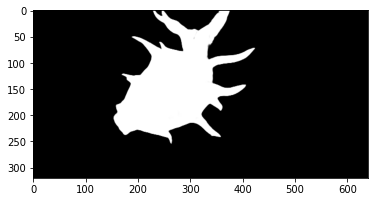

In [ ]:
#print(y[0])
plt.imshow(y_pre[3,:,:,0],"gray")

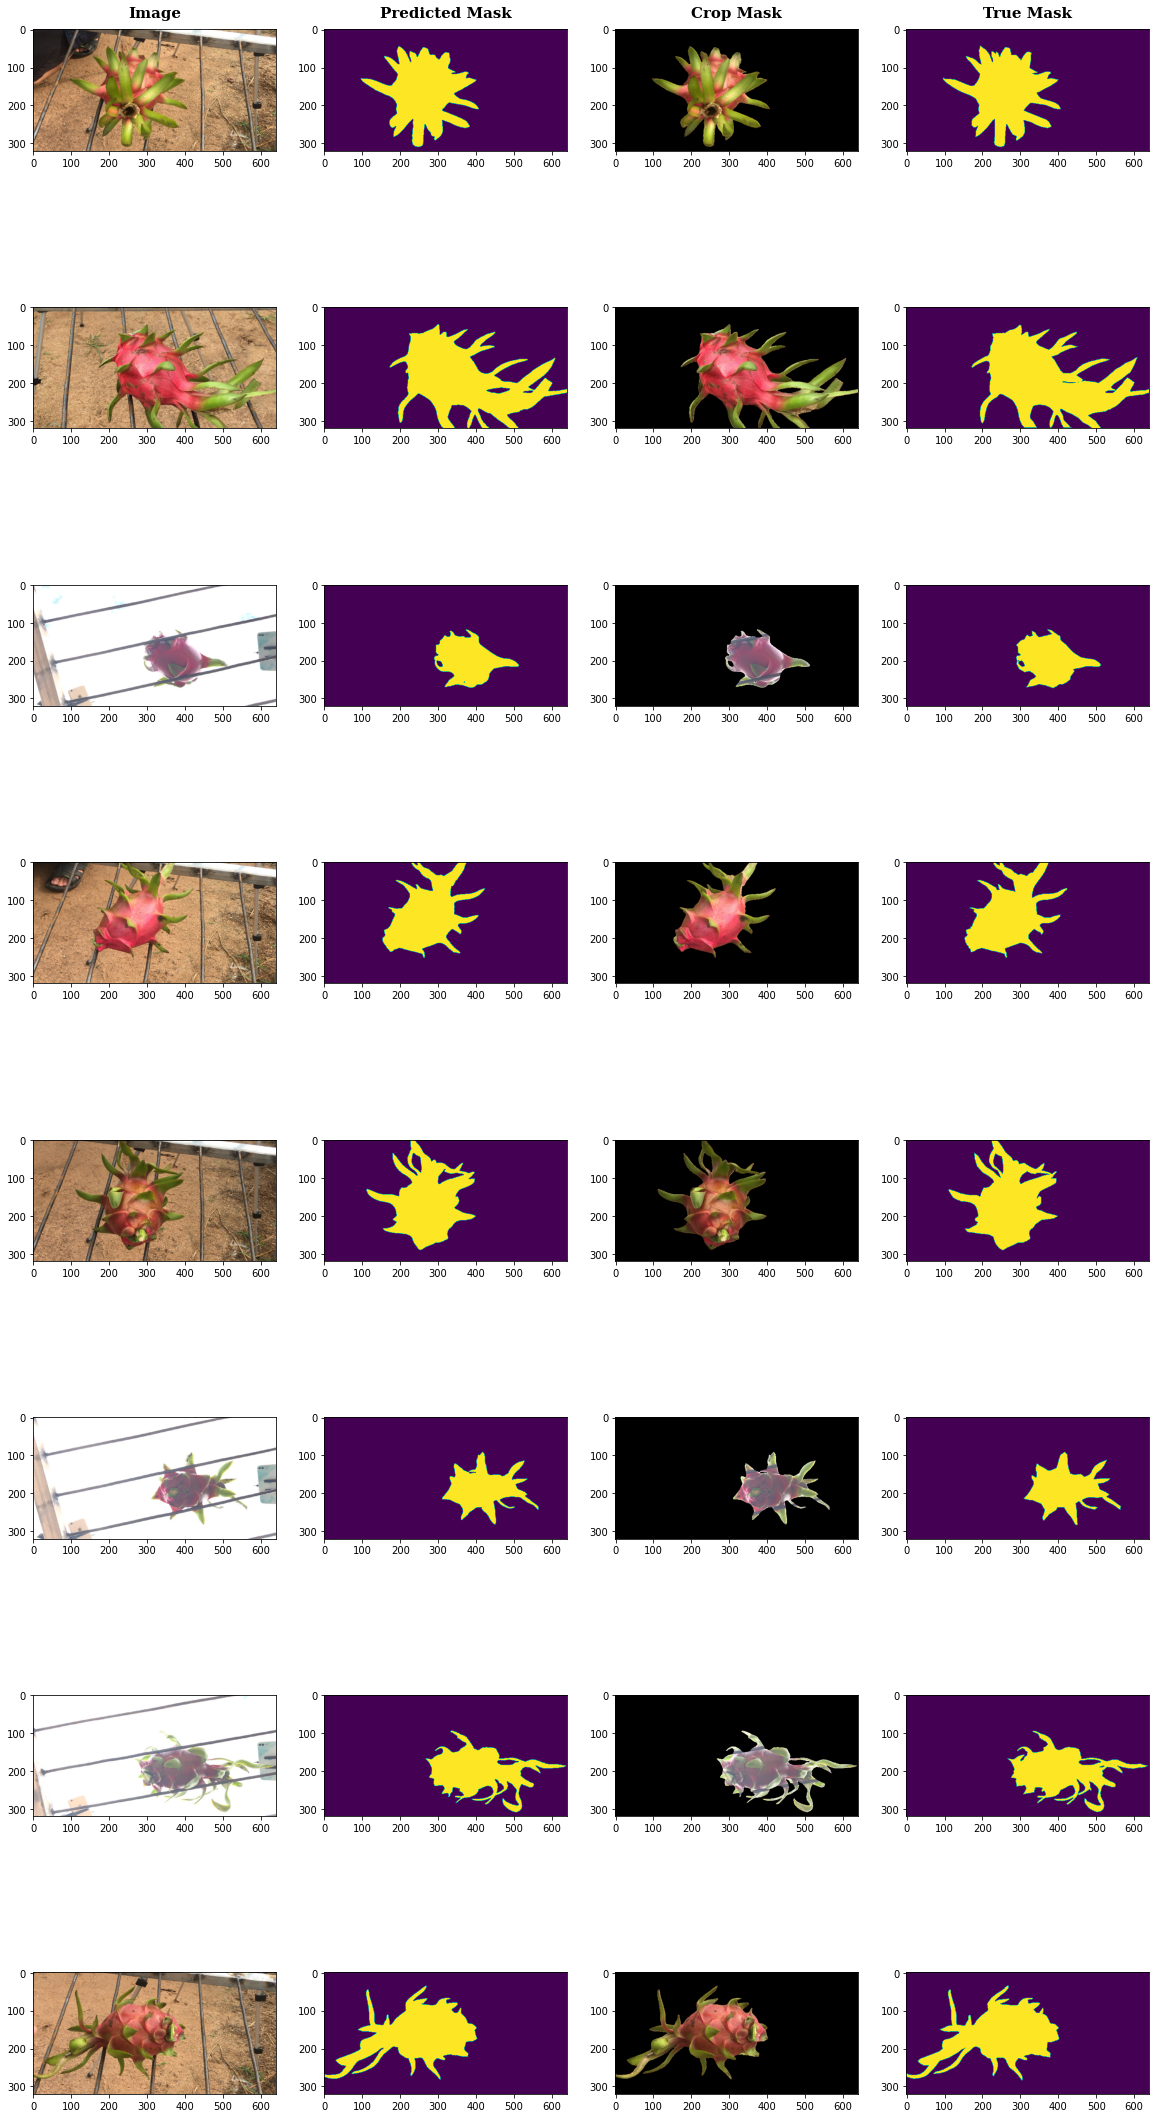

In [ ]:

fig, axes = plt.subplots(len(batch), 4, figsize=(4*5, len(batch) * 5))

for i in range(len(batch)):
    
         
    
    image = batch[i][0]/255

    predicted_mask  =  batch[i][1] 

    true_mask =  batch[i][2]

    #image=  loader_min(image=image)["image"]
    #predicted_mask = loader_min(image=predicted_mask)["image"]
    #true_mask = loader_min(image=true_mask)["image"]

    binary_predicted_mask = np.where(predicted_mask > 0.5, 1, 0)
    fg= binary_predicted_mask.copy().astype(np.int8)
    


    fg = cv2.bitwise_or(image, image, mask=fg)
    
    image_ax, predicted_mask_ax ,fg_ax ,t_mask_ax = axes[i, 0], axes[i, 1], axes[i, 2] ,axes[i,3]
    
    image_ax.imshow(image)
    
    predicted_mask_ax.imshow(binary_predicted_mask)

    t_mask_ax.imshow(true_mask)

    fg_ax.imshow(fg)
    
    
    if i == 0:
        image_ax.set_title("Image", fontsize=15, fontweight="bold", fontfamily="serif", y=1.05)
        
        predicted_mask_ax.set_title("Predicted Mask", fontsize=15, fontweight="bold", fontfamily="serif", y=1.05)
        fg_ax.set_title("Crop Mask", fontsize=15, fontweight="bold", fontfamily="serif", y=1.05)

        t_mask_ax.set_title("True Mask", fontsize=15, fontweight="bold", fontfamily="serif", y=1.05)
        
fig.savefig("Plot_Unet.png")
fig.show()

In [ ]:
test_dir="/content/tl1-1200x676.jpg"

In [ ]:
img = load_img(test_dir, target_size=INPUT_SHAPE[:2]) 
img = img_to_array(img)
img = preprocess_input(img)
batch= np.zeros((1,INPUT_SHAPE[0],INPUT_SHAPE[1],INPUT_SHAPE[2]))
batch[0]= img

In [ ]:
y_t= model.predict(batch)

In [ ]:
print(img)

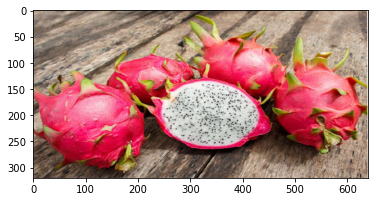

In [ ]:
plt.imshow(img/255)
plt.show()

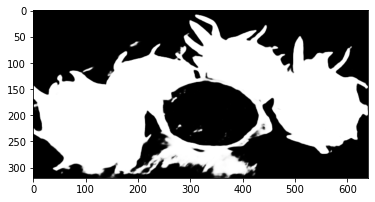

In [ ]:
plt.imshow(y_t[0][:,:,0],'gray')

# Predict and plot

In [ ]:
import time
now=time.time()
y_pre= model.predict(X)
then= time.time()
print(then-now-0.002)

0.6954837779998779


In [ ]:
#vgg16 backbone
model.evaluate_generator(testgen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.05981047824025154, 0.9590575695037842]

In [ ]:
model.save_weights("unet_bg_vgg.h5")

dict_keys(['loss', 'iou_score', 'val_loss', 'val_iou_score'])


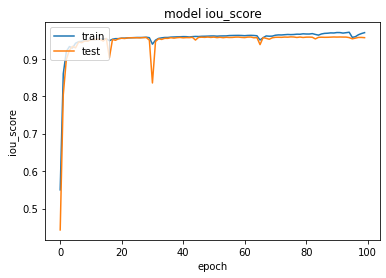

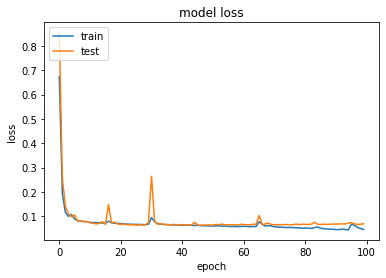

In [ ]:
import matplotlib.pyplot as plt
#hist= hist_model
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['iou_score'])
plt.plot(hist.history['val_iou_score'])
plt.title('model iou_score')
plt.ylabel('iou_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("iou_score_Unet.png")
plt.show()

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("loss_Unet.png")
plt.show()
